# Data Visualization Exercise 😊

In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("./countries-of-the-world.csv")

## Cleaning data

In [9]:
data.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [8]:
data.head(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


#### Renaming columns

In [4]:
columns_to_rename: dict = {
    "Area (sq. mi.)": "Area_(sq. mi.)",
    "Pop. Density (per sq. mi.)": "Pop_Density_(per sq. mi.)",
    "Coastline (coast/area ratio)": "Coastline_(coast/area ratio)",
    "Net migration": "Net_migration",
    "Infant mortality (per 1000 births)": "Infant_mortality_(per 1000 births)",
    "GDP ($ per capita)": "GDP_($ per capita)",
    "Literacy (%)": "Literacy_(%)",
    "Phones (per 1000)": "Phones_(per 1000)",
    "Arable (%)": "Arable_(%)",
    "Crops (%)": "Crops_(%)",
    "Other (%)": "Other_(%)"
}

data = data.rename(columns=columns_to_rename)

print(data.columns)

Index(['Country', 'Region', 'Population', 'Area_(sq. mi.)',
       'Pop_Density_(per sq. mi.)', 'Coastline_(coast/area ratio)',
       'Net_migration', 'Infant_mortality_(per 1000 births)',
       'GDP_($ per capita)', 'Literacy_(%)', 'Phones_(per 1000)', 'Arable_(%)',
       'Crops_(%)', 'Other_(%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')


##### Checking for Null and NaN fields and dropping them 

In [5]:
data.isnull().any()

Country                               False
Region                                False
Population                            False
Area_(sq. mi.)                        False
Pop_Density_(per sq. mi.)             False
Coastline_(coast/area ratio)          False
Net_migration                          True
Infant_mortality_(per 1000 births)     True
GDP_($ per capita)                     True
Literacy_(%)                           True
Phones_(per 1000)                      True
Arable_(%)                             True
Crops_(%)                              True
Other_(%)                              True
Climate                                True
Birthrate                              True
Deathrate                              True
Agriculture                            True
Industry                               True
Service                                True
dtype: bool

In [6]:
# Identify columns with NaN values
columns_with_nan = data.columns[data.isna().any()].tolist()

# Set NaN values in these columns to 0
data[columns_with_nan] = data[columns_with_nan].fillna(0)

data.isnull().any()

Country                               False
Region                                False
Population                            False
Area_(sq. mi.)                        False
Pop_Density_(per sq. mi.)             False
Coastline_(coast/area ratio)          False
Net_migration                         False
Infant_mortality_(per 1000 births)    False
GDP_($ per capita)                    False
Literacy_(%)                          False
Phones_(per 1000)                     False
Arable_(%)                            False
Crops_(%)                             False
Other_(%)                             False
Climate                               False
Birthrate                             False
Deathrate                             False
Agriculture                           False
Industry                              False
Service                               False
dtype: bool

##### Checking for Duplicated Rows

In [7]:
duplicated_rows= data[data.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Country, Region, Population, Area_(sq. mi.), Pop_Density_(per sq. mi.), Coastline_(coast/area ratio), Net_migration, Infant_mortality_(per 1000 births), GDP_($ per capita), Literacy_(%), Phones_(per 1000), Arable_(%), Crops_(%), Other_(%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service]
Index: []


##### Checking Data Type

In [8]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area_(sq. mi.)                          int64
Pop_Density_(per sq. mi.)              object
Coastline_(coast/area ratio)           object
Net_migration                          object
Infant_mortality_(per 1000 births)     object
GDP_($ per capita)                    float64
Literacy_(%)                           object
Phones_(per 1000)                      object
Arable_(%)                             object
Crops_(%)                              object
Other_(%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [9]:
data['Pop_Density_(per sq. mi.)'] = data['Pop_Density_(per sq. mi.)'].astype(str)

In [10]:
# Convert all values to strings and replace commas with periods
columns_to_convert = [
    'Pop_Density_(per sq. mi.)', 'Coastline_(coast/area ratio)', 'Net_migration',
    'Infant_mortality_(per 1000 births)', 'Literacy_(%)', 'Phones_(per 1000)',
    'Arable_(%)', 'Crops_(%)', 'Other_(%)', 'Climate', 'Birthrate', 'Deathrate',
    'Agriculture', 'Industry', 'Service'
]

for column in columns_to_convert:
    data[column] = data[column].astype(str).str.replace(',', '.').astype(float)
    
# Convert integer columns
data['Population'] = data['Population'].astype(int)
data['Area_(sq. mi.)'] = data['Area_(sq. mi.)'].astype(int)
data['GDP_($ per capita)'] = data['GDP_($ per capita)'].astype(int)

data.dtypes

Country                                object
Region                                 object
Population                              int32
Area_(sq. mi.)                          int32
Pop_Density_(per sq. mi.)             float64
Coastline_(coast/area ratio)          float64
Net_migration                         float64
Infant_mortality_(per 1000 births)    float64
GDP_($ per capita)                      int32
Literacy_(%)                          float64
Phones_(per 1000)                     float64
Arable_(%)                            float64
Crops_(%)                             float64
Other_(%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [11]:
data.head(50)

,Country,Region,Population,Area_(sq. mi.),Pop_Density_(per sq. mi.),Coastline_(coast/area ratio),Net_migration,Infant_mortality_(per 1000 births),GDP_($ per capita),Literacy_(%),Phones_(per 1000),Arable_(%),Crops_(%),Other_(%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900,42.0,7.8,2.41,0.24,97.35,0.0,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


In [12]:
# Done with data cleaning

##### Question 1: Bar chart for first 20 countries in dataset given visualizing data on popultion.

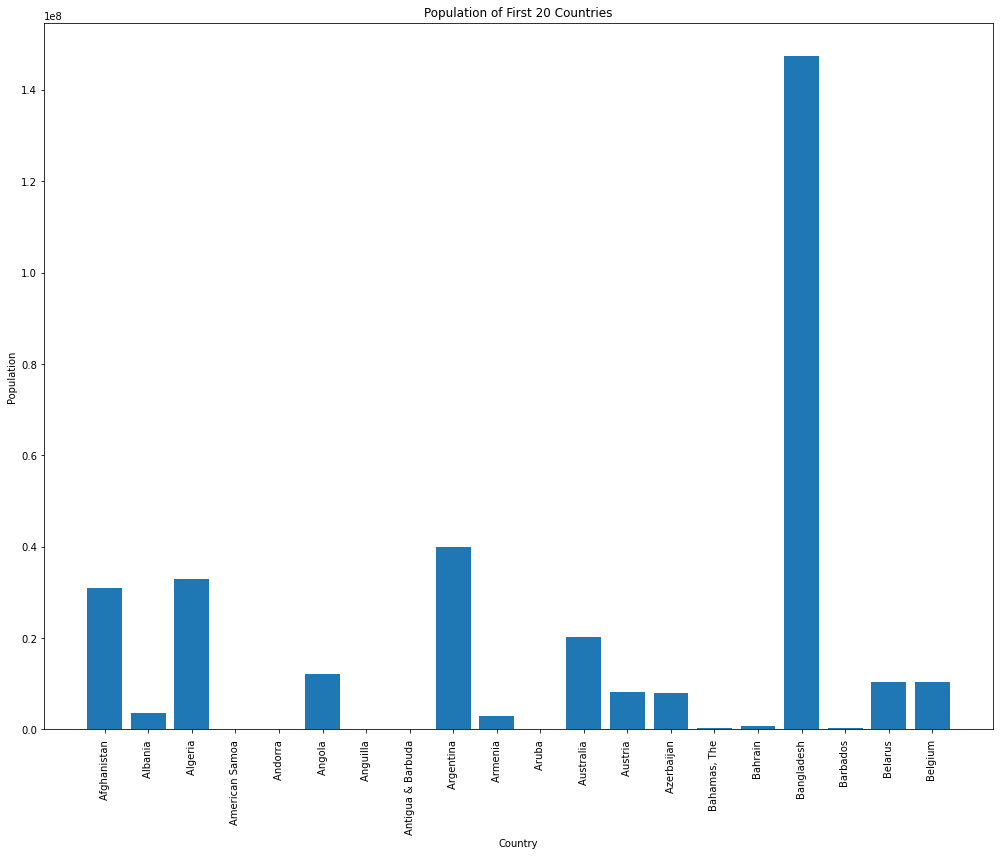

In [13]:
first_20_rows = data.head(20)

X_countries = first_20_rows['Country']
Y_population = first_20_rows['Population']

plt.figure(figsize=(17, 13))
plt.bar(X_countries, Y_population)
plt.xticks(rotation=90)

plt.title('Population of First 20 Countries')
plt.xlabel("Country")
plt.ylabel("Population")

plt.show()

##### Question 2: Line graph of Phones (per 1000) against the population data

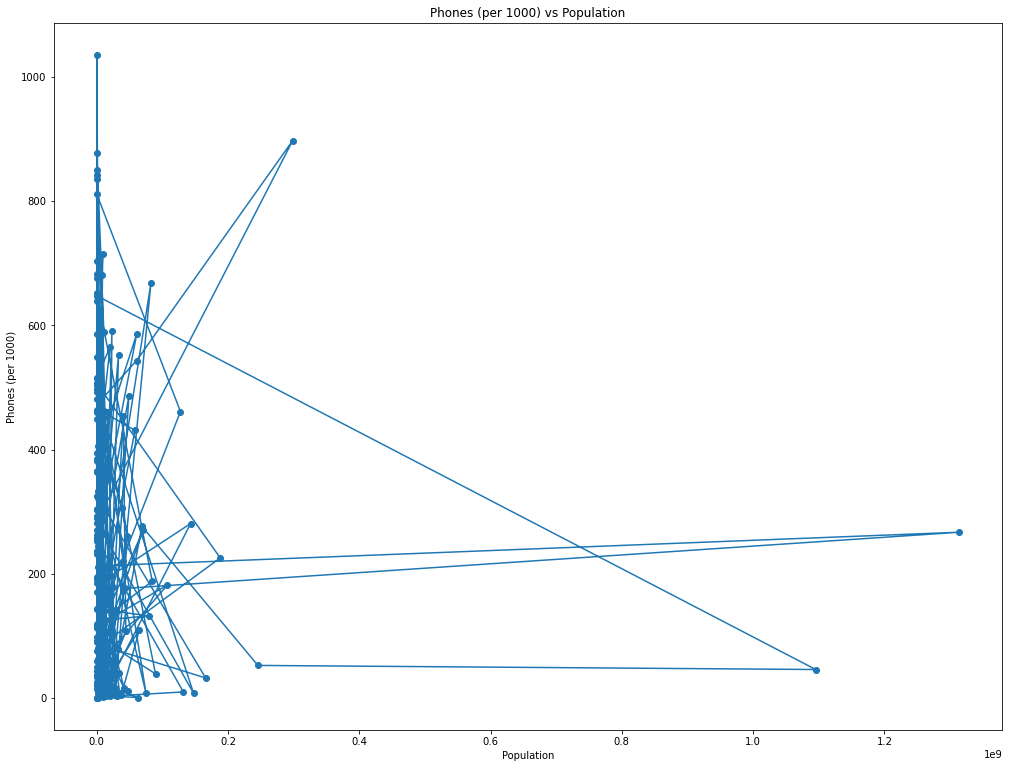

In [14]:
plt.figure(figsize=(17, 13))
plt.plot(data['Population'], data['Phones_(per 1000)'], marker='o')
plt.title('Phones (per 1000) vs Population')
plt.xlabel('Population')
plt.ylabel('Phones (per 1000)')
plt.show()

##### Question 3: Literacy rate against population

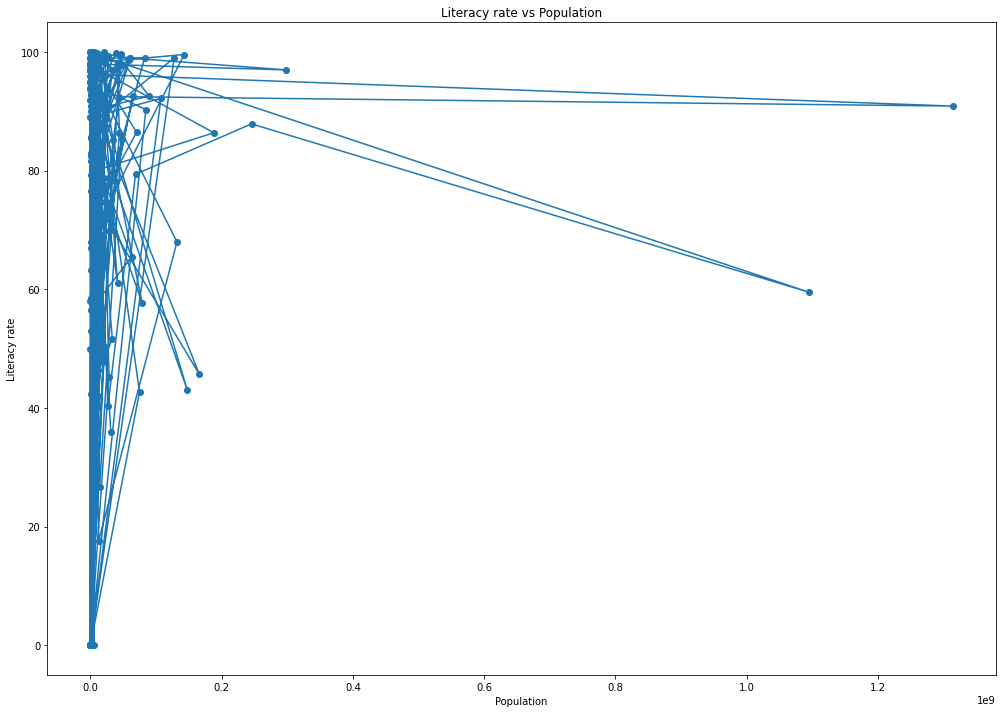

In [15]:
plt.figure(figsize=(17, 12))
plt.plot(data['Population'], data['Literacy_(%)'], marker='o')
plt.title('Literacy rate vs Population')
plt.xlabel('Population')
plt.ylabel('Literacy rate')
plt.show()

#### Question 4: Plot the data on infant mortality, birthrate and deathrate.

In [16]:
print(data.columns)

Index(['Country', 'Region', 'Population', 'Area_(sq. mi.)',
       'Pop_Density_(per sq. mi.)', 'Coastline_(coast/area ratio)',
       'Net_migration', 'Infant_mortality_(per 1000 births)',
       'GDP_($ per capita)', 'Literacy_(%)', 'Phones_(per 1000)', 'Arable_(%)',
       'Crops_(%)', 'Other_(%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')


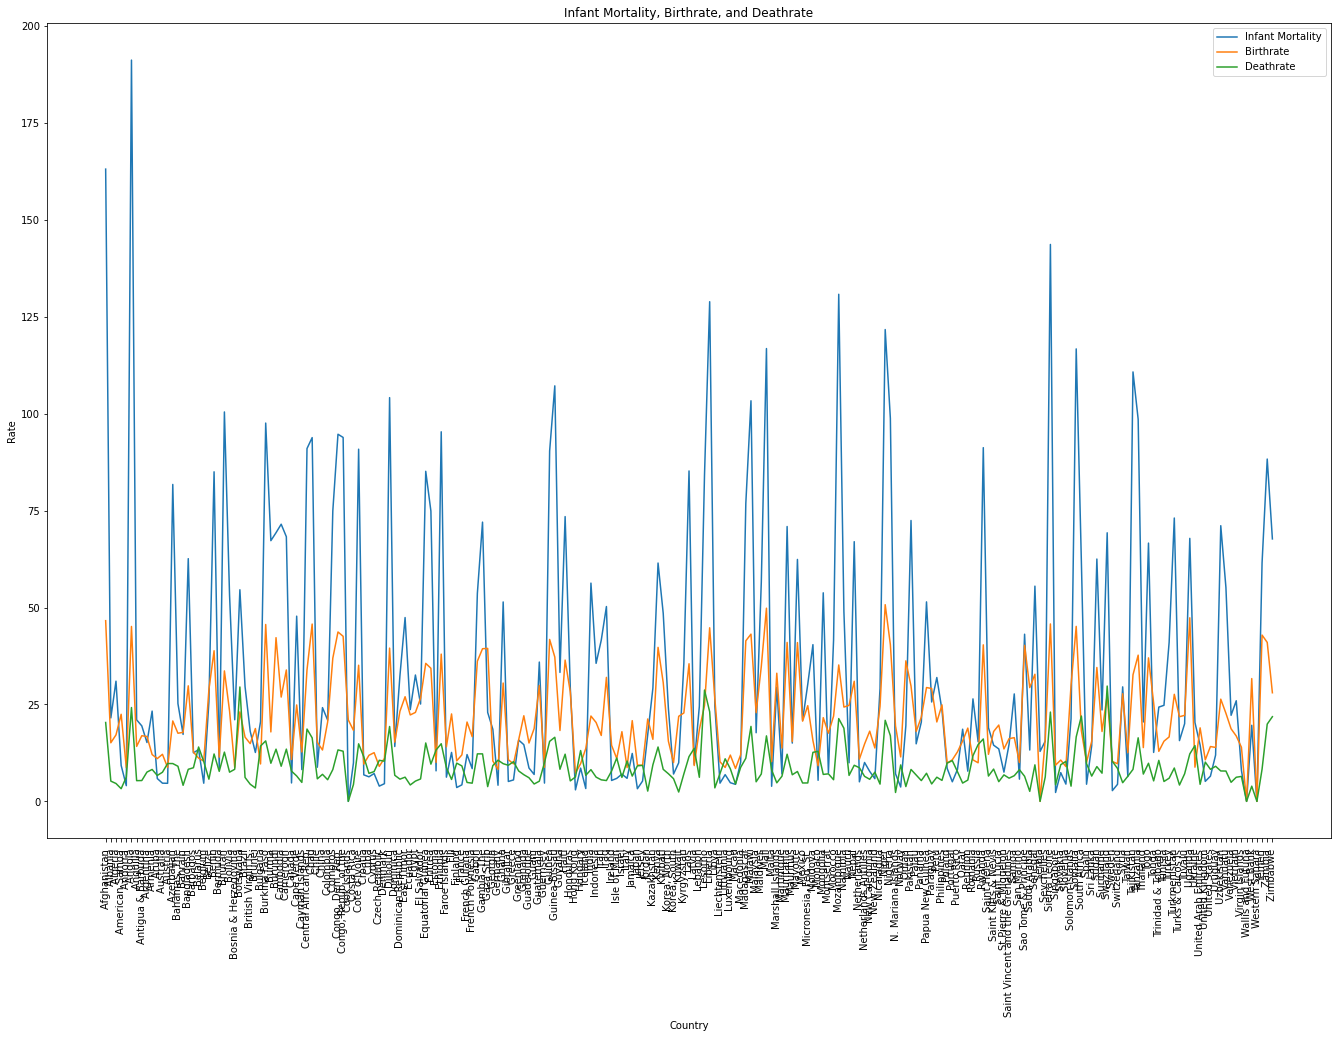

In [17]:
plt.figure(figsize=(23, 15))

plt.plot(data['Country'], data['Infant_mortality_(per 1000 births)'], label='Infant Mortality')
plt.plot(data['Country'], data['Birthrate'], label='Birthrate')
plt.plot(data['Country'], data['Deathrate'], label='Deathrate')

plt.xticks(rotation=90)

plt.title('Infant Mortality, Birthrate, and Deathrate')
plt.xlabel('Country')
plt.ylabel('Rate')

plt.legend()

plt.show()

##### Question 5: GDP data against Agriculture, Industry and Service

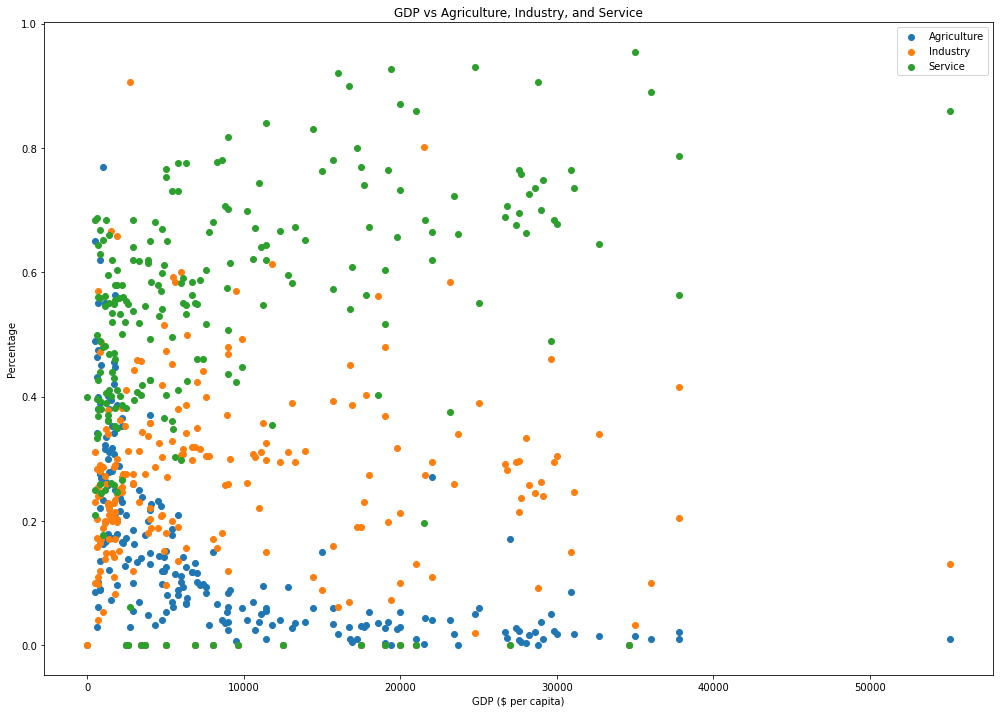

In [18]:
plt.figure(figsize=(17, 12))

plt.scatter(data['GDP_($ per capita)'], data['Agriculture'], label='Agriculture')
plt.scatter(data['GDP_($ per capita)'], data['Industry'], label='Industry')
plt.scatter(data['GDP_($ per capita)'], data['Service'], label='Service')

plt.title('GDP vs Agriculture, Industry, and Service')
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Percentage')

plt.legend()

plt.show()